In [1]:
import numpy as np
import pandas as pd
import functions
from Bio.SeqUtils.ProtParam import ProteinAnalysis
%load_ext autoreload
%autoreload 2

#  pET data

In [2]:
pET = pd.read_pickle('results/pET_complete.pkl.gz')
pET.shape


(12216, 5)

In [3]:
pET.head()

Accession  \
pET15 2  BbCD00584211_pET15   
      3  BcCD00331746_pET15   
      4  BcCD00331747_pET15   
      5  BcCD00341383_pET15   
      6  BcCD00591009_pET15   

                                                  Sequence  Class  Solubility  \
pET15 2  ATGGGCCATCACCATCACCATCACAGCCATATGATTTTTGTAACTA...      2           1   
      3  ATGGGCCATCACCATCACCATCACAGCCATATGGATAAAGAGAATC...      1           0   
      4  ATGGGCCATCACCATCACCATCACAGCCATATGGCACATACTACTA...      2           1   
      5  ATGGGCCATCACCATCACCATCACAGCCATATGGATAAAGAGAATC...      1           0   
      6  ATGGGCCATCACCATCACCATCACAGCCATATGAGTTTGAAGGGGA...      2           1   

                                                   Protein  
pET15 2  MGHHHHHHSHMIFVTKLNGDGYYLNPYHIESIEANPDTTILLMNGK...  
      3  MGHHHHHHSHMDKENPRVGDKYITVQKVGKKIFEAEVEILEYDAPH...  
      4  MGHHHHHHSHMAHTTTSMEIFGSPEQVWQLIGGFNSLPDWLPYIPS...  
      5  MGHHHHHHSHMDKENPRVGDKYITVQKVGKKIFEAEVEILEYDAPH...  
      6  MGHHHHHHSHMSLKGKRIGFGFTGSHCTYEEVMPHLEKLIAEGAEV...

In [4]:
#feature analysis

pET['Analysed_seq'] = pET['Protein'].apply(ProteinAnalysis)
pET['Molecular weight'] = pET['Analysed_seq'].apply(lambda x:x.molecular_weight())
pET['Aromaticity'] = pET['Analysed_seq'].apply(lambda x:x.aromaticity())
pET['Instability index'] = pET['Analysed_seq'].apply(lambda x: x.instability_index())
pET['Isoelectric point'] = pET['Analysed_seq'].apply(lambda x:x.isoelectric_point())
pET['Sec_str_fraction'] = pET['Analysed_seq'].apply(lambda x:x.secondary_structure_fraction())
pET['Flexibility_scores'] = pET['Analysed_seq'].apply(lambda x:x.flexibility())
pET['GRAVY'] = pET['Analysed_seq'].apply(lambda x:x.gravy())

#Averaged flexibility
pET['Flexibility'] = pET['Flexibility_scores'].apply(np.mean)



#separate sec str in helix turn sheets
pET['Helix'] = pET['Sec_str_fraction'].apply(lambda x:x[0])
pET['Turn'] = pET['Sec_str_fraction'].apply(lambda x:x[1])
pET['Sheet'] = pET['Sec_str_fraction'].apply(lambda x:x[2])

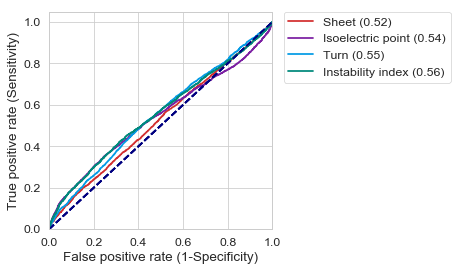

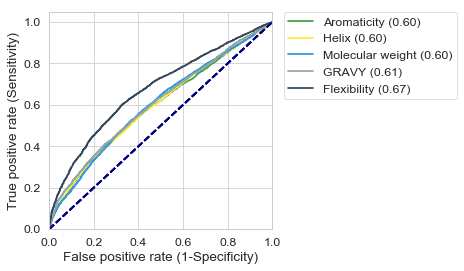

In [21]:
flatui = ["#d32f2f", "#7b1fa2", "#039be5", "#00897b", "#43a047", "#ffeb3b",  "#3498db", "#95a5a6",  "#34495e", "#2ecc71" ]
colors = functions.sns.color_palette(flatui)



df = pET[['Sheet',  'Isoelectric point', 'Turn', 'Instability index' , 'Molecular weight', \
          'Aromaticity', 'Helix', 'GRAVY', 'Flexibility', 'Solubility']].copy()


df1 = pET[['Sheet', 'Isoelectric point', 'Turn', 'Instability index' ]].copy()

#making some columns negative for auc < 0.5
for i, v in enumerate(df1.columns):
    if 'Flexibility' not in v and 'Sheet' not in v and 'AAS' not in v:
        df1[v] = -df1[v]


labels = pET['Solubility'].values
functions.make_roc(df1, labels, output=True, fname='ROC_for_pET_0.pdf', c=colors[0:4])

##second plot

df2 = pET[['Aromaticity', 'Helix' , 'Molecular weight', \
           'GRAVY', 'Flexibility']].copy()


#making some columns negative for auc < 0.5
for i, v in enumerate(df2.columns):
    if 'Flexibility' not in v and 'Sheet' not in v and 'AAS' not in v:
        df2[v] = -df2[v]



functions.make_roc(df2, labels, output=False, fname='ROC_for_pET_1.pdf', c=colors[4:])


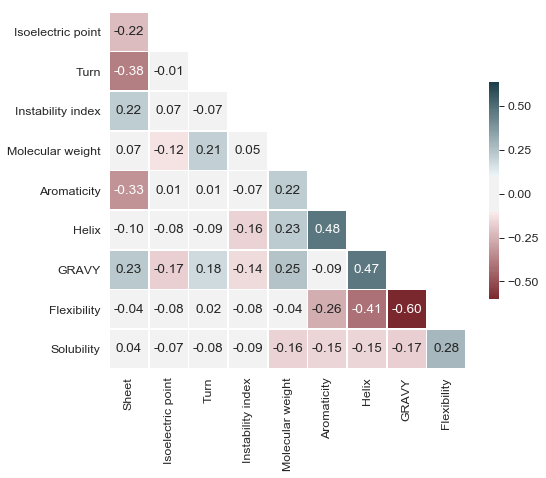

In [23]:
functions.corr_heatmap(df, squared=False, output=False, fname='Heatmap_for_pET_no_SWI.pdf',\
                       xlim=(0,9), ylim=(10,1))


In [7]:
#correlations
from scipy.stats import spearmanr


df_corr = pd.DataFrame() # Correlation matrix
df_p = pd.DataFrame()  # Matrix of p-values
for x in df.columns:
    for y in df.columns:
        corr1 = spearmanr(df[x], df[y])
        df_corr.loc[x,y] = corr1[0]
        df_p.loc[x,y] = corr1[1]



In [25]:
print('Correlations')
df_corr


Correlations


,Sheet,Isoelectric point,Turn,Instability index,Molecular weight,Aromaticity,Helix,GRAVY,Flexibility,Solubility
Sheet,1.000000,-0.222060,-0.375104,0.220627,0.070636,-0.328068,-0.097355,0.232137,-0.041549,0.040284
Isoelectric point,-0.222060,1.000000,-0.010108,0.072233,-0.124552,0.009231,-0.082686,-0.171168,-0.083467,-0.065772
Turn,-0.375104,-0.010108,1.000000,-0.073050,0.210953,0.010417,-0.089198,0.182721,0.024328,-0.080815
Instability index,0.220627,0.072233,-0.073050,1.000000,0.045370,-0.072715,-0.159392,-0.143305,-0.076660,-0.090254
Molecular weight,0.070636,-0.124552,0.210953,0.045370,1.000000,0.222074,0.226637,0.249705,-0.037168,-0.162451
Aromaticity,-0.328068,0.009231,0.010417,-0.072715,0.222074,1.000000,0.476667,-0.090969,-0.259083,-0.154726
Helix,-0.097355,-0.082686,-0.089198,-0.159392,0.226637,0.476667,1.000000,0.470759,-0.409018,-0.154866
GRAVY,0.232137,-0.171168,0.182721,-0.143305,0.249705,-0.090969,0.470759,1.000000,-0.600141,-0.170855
Flexibility,-0.041549,-0.083467,0.024328,-0.076660,-0.037168,-0.259083,-0.409018,-0.600141,1.000000,0.280697
Solubility,0.040284,-0.065772,-0.080815,-0.090254,-0.162451,-0.154726,-0.154866,-0.170855,0.280697,1.000000


In [26]:
print('Bonferroni corrected p values')
#correction for p-values
bonferroni_ = len(df_corr)*(len(df_corr)-1)/2
df_p*bonferroni_

Bonferroni corrected p values


,Sheet,Isoelectric point,Turn,Instability index,Molecular weight,Aromaticity,Helix,GRAVY,Flexibility,Solubility
Sheet,0.000000e+00,1.112932e-134,0.000000e+00,6.590711e-133,2.452378e-13,9.481450e-303,1.828499e-25,1.690913e-147,1.958930e-04,3.796681e-04
Isoelectric point,1.112932e-134,0.000000e+00,1.187675e+01,5.912798e-14,8.851210e-42,1.384428e+01,2.474925e-18,2.568619e-79,1.104583e-18,1.539834e-11
Turn,0.000000e+00,1.187675e+01,0.000000e+00,2.823298e-14,2.836412e-121,1.123262e+01,2.348993e-21,1.536995e-90,3.224890e-01,1.660256e-17
Instability index,6.590711e-133,5.912798e-14,2.823298e-14,0.000000e+00,2.365708e-05,3.827521e-14,1.135750e-68,2.087435e-55,9.749849e-16,7.228754e-22
Molecular weight,2.452378e-13,8.851210e-42,2.836412e-121,2.365708e-05,0.000000e+00,1.068882e-134,2.004157e-140,2.287834e-171,1.787726e-03,2.324983e-71
Aromaticity,9.481450e-303,1.384428e+01,1.123262e+01,3.827521e-14,1.068882e-134,0.000000e+00,0.000000e+00,3.227827e-22,6.494171e-185,1.131499e-64
Helix,1.828499e-25,2.474925e-18,2.348993e-21,1.135750e-68,2.004157e-140,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.616920e-65
GRAVY,1.690913e-147,2.568619e-79,1.536995e-90,2.087435e-55,2.287834e-171,3.227827e-22,0.000000e+00,0.000000e+00,0.000000e+00,5.049307e-79
Flexibility,1.958930e-04,1.104583e-18,3.224890e-01,9.749849e-16,1.787726e-03,6.494171e-185,0.000000e+00,0.000000e+00,0.000000e+00,2.509464e-218
Solubility,3.796681e-04,1.539834e-11,1.660256e-17,7.228754e-22,2.324983e-71,1.131499e-64,8.616920e-65,5.049307e-79,2.509464e-218,0.000000e+00
